## k-평균

#### KMeans 클래스
#### 보통의 비지도 학습에서 사과, 바나나, 파인애플과 같이 클래스를 알 수가 없음
#### 이 방법을 해결하기 위해 가까운 샘플과 평균값을 비교한 알고리즘인 k-means를 사용함

In [17]:
# 데이터 로드 및 배열 변경
import numpy as np

fruits = np.load('fruits_300.npy')

In [18]:
fruits_2d = fruits.reshape(-1, 100*100)

In [19]:
fruits_2d.shape

(300, 10000)

In [20]:
# k-means 훈련
from sklearn.cluster import KMeans 

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d) # 타깃이 없는 데이터셋

c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [21]:
# km 모델이 라벨링한 값
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [22]:
# 고유값 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


In [23]:
# 그래프 그리기
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플의 개수
    # 한줄에 10개의 이미지를 그림
    rows = int(np.ceil(n/10))
    # rows가 1이면 열에 들어가는 이미지 개수는 샘플의 수, 2이상이면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그리도록 설정
                axs[i, j].imshow(arr[i*10], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

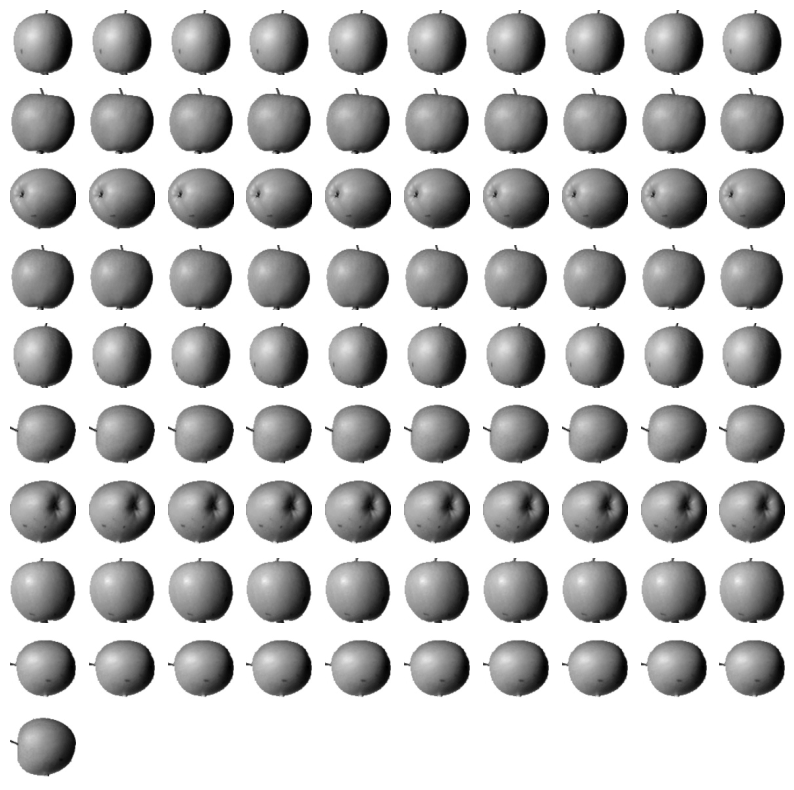

In [25]:
# 0번 라벨이 찍힌 셈플 그리기
draw_fruits(fruits[km.labels_==0])

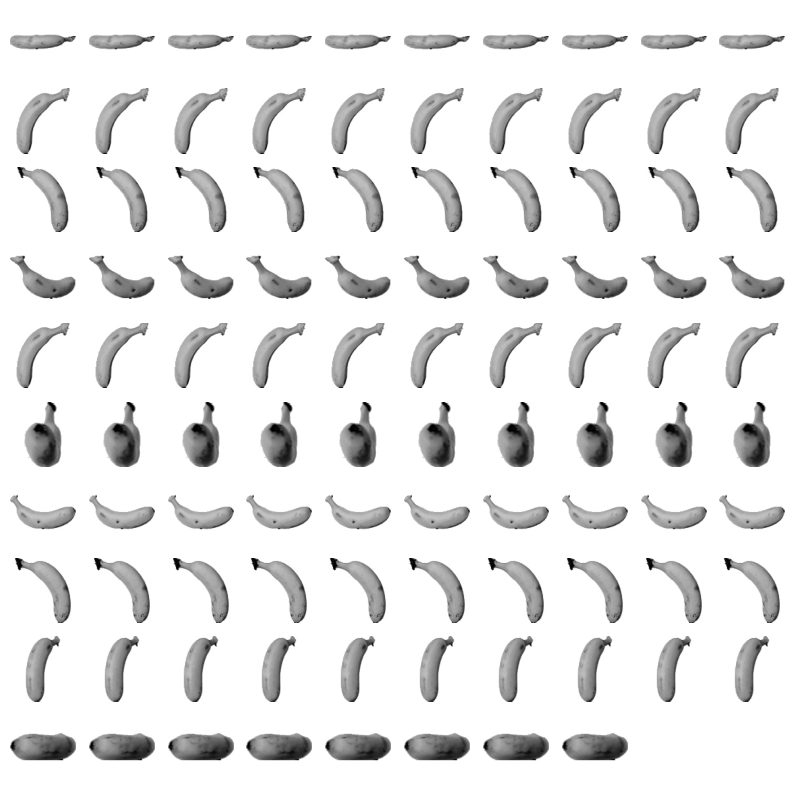

In [26]:
draw_fruits(fruits[km.labels_==1])

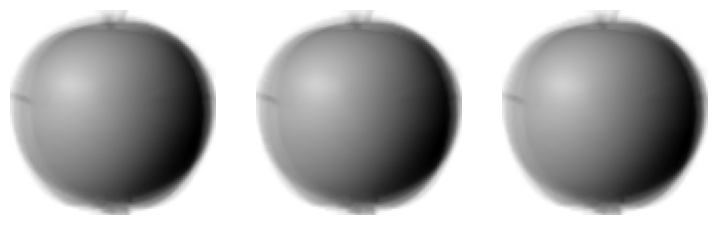

In [31]:
# 클러스터의 중심
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [28]:
##### k-means는 훈련데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transfrom()를 가지고 있음 
# 아래 코드는, 100번째 이미지가 3개의 클러스터 중심과 얼만큼의 거리를 갖는지 보여줌
# 0=사과, 1=바나나, 2=파인애플
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [30]:
print(km.predict(fruits_2d[100:101]))

[2]


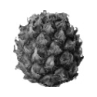

In [33]:
draw_fruits(fruits[100:101])

In [34]:
# 클러스터의 이동 횟수 
print(km.n_iter_)

4


## 최적의 k값 찾기

#### k-means의 가장 큰 단점 중 하나는, 클러스터 갯수를 사전에 하이퍼 파라미터로 지정해야함
#### 실전에서는 클래스의 갯수가 몇개인지 모름
#### 따라서, 이 k값(n_cluster)을 설정할 수 없기 때문에, 이너셔 알고리즘 중 엘보우 방법을 대표적으로 사용함
#### 이너셔란, 클러스터에 속한 셈플이 얼마나 조밀하게 모여있는지를 나타내는 값

c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

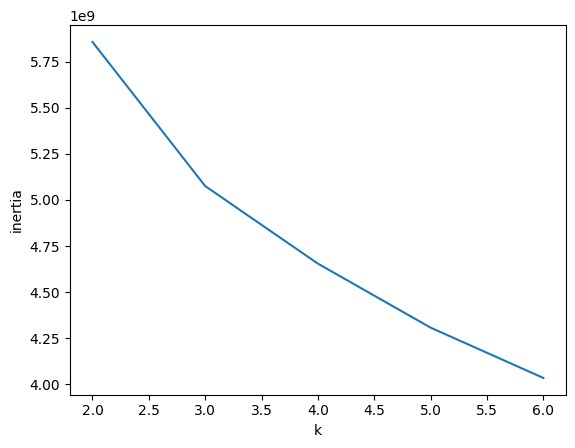

In [36]:
# k-means는 자동으로 이너셔를 계산해서 모델 파라미터로 저장
# 클러스터의 갯수를 2~6까지 늘려가면서 이너셔의 변화 확인
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()